In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

df.Sex[df.Sex == 'F'] = -1
df.Sex[df.Sex == 'M'] = 1
df.Sex[df.Sex == 'I'] = 0

#data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [3]:
df.tail(3)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,1,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [4]:
X = df.drop('Rings', axis=1).as_matrix()
y = df['Rings'].as_matrix()

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import r2_score

# cross validating data
cv = KFold(len(X), n_folds=5, shuffle=True, random_state=1)
score = []
for i in xrange(1,51):
    clf = RandomForestRegressor(n_estimators=i, random_state=1)
    score.append(np.mean(cross_val_score(clf, X, y, scoring='r2', cv=cv)))

In [9]:
print score

[0.10213869487724367, 0.33841675515802144, 0.40357984946186909, 0.44272239896668103, 0.46402076606749693, 0.47058163275877918, 0.47583061635230062, 0.4817418456255852, 0.4883478130215681, 0.49446412480247826, 0.4933965550001963, 0.49796587639761541, 0.50213646057228534, 0.50642869622573283, 0.50833119704321006, 0.51051314383221469, 0.51384829479930283, 0.51632754127394931, 0.51903468813638798, 0.51867359287238224, 0.51983542335425015, 0.52015835367222107, 0.52101727093662509, 0.52240318258080909, 0.52261746396760711, 0.52380615817170517, 0.52412235221889814, 0.52505374512324399, 0.52597037563489313, 0.52653782166757546, 0.52709985443060225, 0.52838940820927838, 0.52961655612292768, 0.52956395544383794, 0.52951724744047302, 0.5295996267890184, 0.52913141344745995, 0.52916025763348329, 0.52924098102743389, 0.52906701596316297, 0.52934200569111833, 0.52957320653375461, 0.52937549466485323, 0.52911923375632508, 0.52837546602772023, 0.52852042754934581, 0.52870494457919082, 0.52961275154377

In [10]:
for i in xrange(len(score)):
    if score[i] > 0.52:
        res = i+1
        print res
        break

22


In [11]:
with open('q1.txt','w') as f:
    f.write(str(res))
f.close()

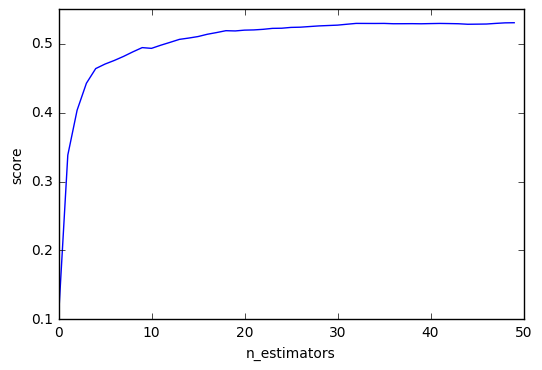

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(score)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()